# Data Cleaning

## Introduction

I'm interested in the differences between episodes from the different seasons of law and order SVU. There are a lot of things I liked about the first few seasons, but I think they hit the sweet spot around seasons 3-5. Although I think it has a lot to do with the cast( Ice-T wasn't brought on as a cast member until a later episode in season 2), and some other changes to the basic formula. 

Goal: look at the differences in seasons' episodes to determine if the transcripts provide reasonable cause as to why certain seasons are 'better'(in my opinion) than others.

## obtain data

__*__ _Law and order episode transcripts obtained from: __'transcripts.foreverdreaming.org'___

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import nltk
import urllib.request
from bs4 import BeautifulSoup
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
stopwords = stopwords.words()
nltk.download('stopwords', 'wordnet')
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction import text 
import re
import string
from pywsd.utils import lemmatize_sentence
from wordcloud import WordCloud

[nltk_data] Downloading package stopwords to wordnet...
[nltk_data]   Package stopwords is already up-to-date!
Warming up PyWSD (takes ~10 secs)... took 12.161115169525146 secs.


### nlp functions

In [2]:
def clean_text(text):
    text = text.lower()
    text = re.sub('\[.*?\]', ' ', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), ' ', text)
    text = re.sub('\w*\d\w*', ' ', text)
    text = text.strip()
    text = lemmatize_sentence(text)
    text = [word for word in text if word not in stopwords]
    return text

In [3]:
def url_to_transcript(url):
    response = urllib.request.urlopen(url)
    html = response.read()
    soup = BeautifulSoup(html, 'html5lib')
    text = soup.get_text(strip = True)
    text = clean_text(text)
    return text

In [4]:
# URLs of episode 1-12 transcripts
urls = ['https://transcripts.foreverdreaming.org/viewtopic.php?f=421&t=21377/',
        'https://transcripts.foreverdreaming.org/viewtopic.php?f=421&t=21402/',
        'https://transcripts.foreverdreaming.org/viewtopic.php?f=421&t=21427/',
        'https://transcripts.foreverdreaming.org/viewtopic.php?f=421&t=21453/',
        'https://transcripts.foreverdreaming.org/viewtopic.php?f=421&t=21477/',
        'https://transcripts.foreverdreaming.org/viewtopic.php?f=421&t=21502/',
        'https://transcripts.foreverdreaming.org/viewtopic.php?f=421&t=21527/',
        'https://transcripts.foreverdreaming.org/viewtopic.php?f=421&t=21553/',
        'https://transcripts.foreverdreaming.org/viewtopic.php?f=421&t=21577/',
        'https://transcripts.foreverdreaming.org/viewtopic.php?f=421&t=21603/',
        'https://transcripts.foreverdreaming.org/viewtopic.php?f=421&t=21628/',
        'https://transcripts.foreverdreaming.org/viewtopic.php?f=421&t=21679/']

# seasons
seasons = ['one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine', 'ten', 'eleven', 'twelve']

In [5]:
transcripts = [url_to_transcript(u) for u in urls]

### frequency plot- top 20 words

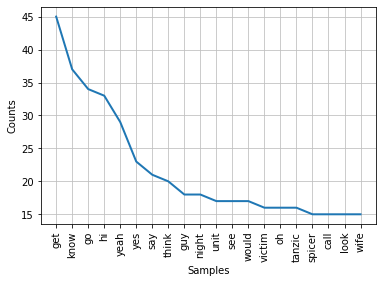

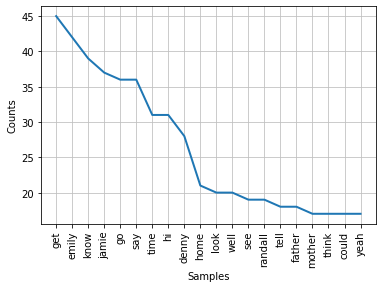

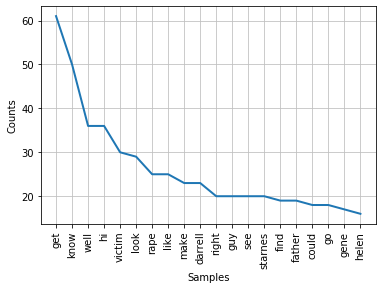

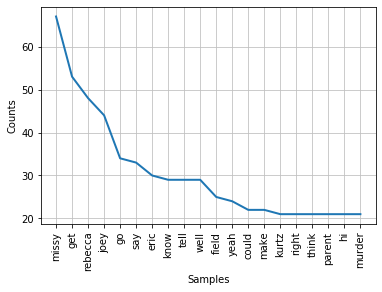

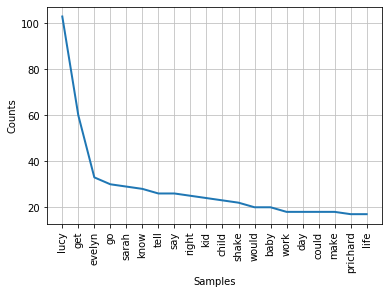

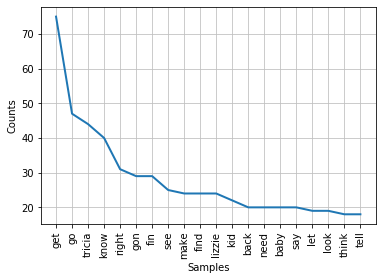

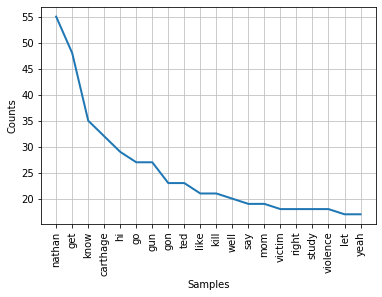

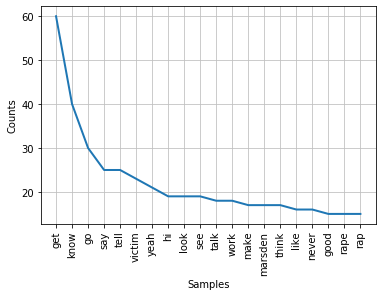

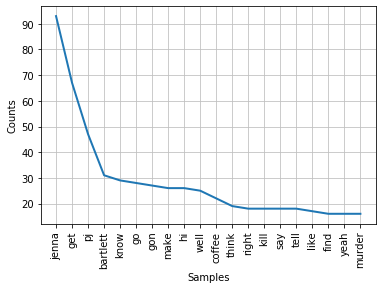

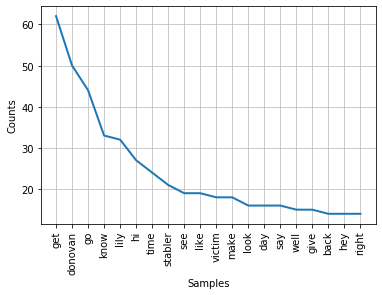

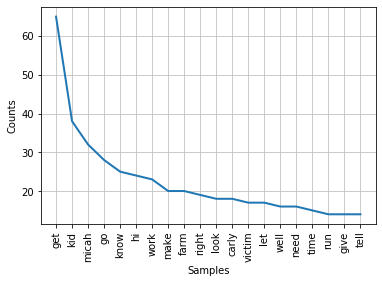

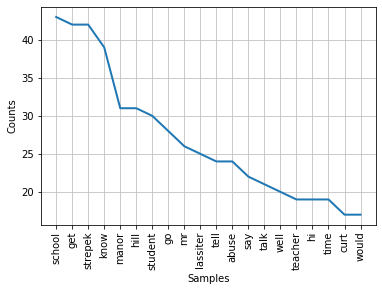

In [6]:
# word counts pre-cleaned text
for transcript in transcripts:
    freq = nltk.FreqDist(transcript)
    freq.plot(20, cumulative = False)    

In [7]:
data = {}
for i, c in zip(seasons, transcripts):
    data[i] = c

# make sure data has been loaded properly
data.keys()

dict_keys(['one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine', 'ten', 'eleven', 'twelve'])

In [8]:
# change this to key - season, value- transcript
def combine_text(list_of_text):
    '''Takes a list of text and combines them into one large chunk of text.'''
    combined_text = ' '.join(list_of_text)
    return combined_text
# combine
data_combined = {key: [combine_text(value)] for (key, value) in data.items()}

In [9]:
# convert to pandas df
pd.set_option('max_colwidth',150)
data_df = pd.DataFrame.from_dict(data_combined).transpose()
data_df.columns = ['transcript']

In [10]:
data_df.head()

,transcript
one,payback law order special victim unit transcript forever dream adsbygoogle window adsbygoogle push google client pub enable page level true toggle...
two,legacy law order special victim unit transcript forever dream adsbygoogle window adsbygoogle push google client pub enable page level true toggle ...
three,inheritance law order special victim unit transcript forever dream adsbygoogle window adsbygoogle push google client pub enable page level true to...
four,damage law order special victim unit transcript forever dream adsbygoogle window adsbygoogle push google client pub enable page level true toggle ...
five,shake law order special victim unit transcript forever dream adsbygoogle window adsbygoogle push google client pub enable page level true toggle n...


In [11]:
data_clean = data_df.copy()

In [12]:
# creating a document-term matrix using CountVectorizer
cv = CountVectorizer()
data_cv = cv.fit_transform(data_clean.transcript)
data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_dtm.index = data_clean.index
data_dtm

,aah,ababa,abandon,abby,abduct,aberrant,abide,abidin,ability,able,...,zealot,zero,zhang,zipper,zone,zoo,zoom,zygomatic,ºñġlaw,¾æ
one,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
two,0,0,1,0,0,1,0,5,0,0,...,0,0,0,0,0,0,0,0,0,0
three,0,0,0,0,0,0,0,0,0,1,...,0,1,2,0,0,0,0,0,0,0
four,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
five,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,2,0,0,0,0
six,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
seven,0,0,0,0,0,0,0,0,1,2,...,0,0,0,0,0,0,0,0,0,0
eight,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
nine,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
ten,0,0,0,0,2,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [13]:
#data = data_dtm.copy()

In [14]:
data = data_dtm.transpose()

In [15]:
data.head()

,one,two,three,four,five,six,seven,eight,nine,ten,eleven,twelve
aah,0,0,0,0,0,0,0,0,0,0,1,0
ababa,0,0,0,0,0,0,0,0,1,0,0,0
abandon,0,1,0,0,0,1,0,1,0,0,0,0
abby,1,0,0,0,0,0,0,0,0,0,0,0
abduct,0,0,0,0,0,0,0,0,0,2,0,0


In [16]:
# Find the top 30 words said each season
top_dict = {}
for c in data.columns:
    top = data[c].sort_values(ascending=False).head(30)
    top_dict[c]= list(zip(top.index, top.values))
#top_dict

In [17]:
# Print the top 15 words each season
for season, top_words in top_dict.items():
    print(season)
    print(', '.join([word for word, count in top_words[0:14]]))
    print('---')

# some words may have very little meaning and could be added to stop words.

one
get, know, go, hi, yeah, yes, say, think, guy, night, see, unit, would, victim
---
two
get, emily, know, jamie, say, go, hi, time, denny, home, look, well, see, randall
---
three
get, know, well, hi, victim, look, rape, like, make, darrell, starnes, see, right, guy
---
four
missy, get, rebecca, joey, go, say, eric, tell, well, know, field, yeah, could, make
---
five
lucy, get, evelyn, go, sarah, know, say, tell, right, kid, child, shake, would, baby
---
six
get, go, tricia, know, right, gon, fin, see, find, lizzie, make, kid, say, need
---
seven
nathan, get, know, carthage, hi, go, gun, ted, gon, kill, like, well, say, mom
---
eight
get, know, go, say, tell, victim, yeah, see, look, hi, talk, work, make, think
---
nine
jenna, get, pj, bartlett, know, go, gon, hi, make, well, coffee, think, kill, tell
---
ten
get, donovan, go, know, lily, hi, time, stabler, like, see, victim, make, say, look
---
eleven
get, kid, micah, go, know, hi, work, make, farm, right, carly, look, victim, let


In [18]:
# Look at the most common top words --> add them to the stop word list
from collections import Counter

# Let's first pull out the top 30 words for each season
words = []
for season in data.columns:
    top = [word for (word, count) in top_dict[season]]
    for t in top:
        words.append(t)
        
#words

In [19]:
# Let's aggregate this list and identify the most common words along with how many episodes they occur in
Counter(words).most_common()

[('get', 12),
 ('know', 12),
 ('go', 12),
 ('hi', 11),
 ('say', 11),
 ('think', 11),
 ('tell', 11),
 ('right', 10),
 ('look', 9),
 ('well', 9),
 ('yeah', 8),
 ('victim', 8),
 ('find', 8),
 ('make', 8),
 ('see', 7),
 ('could', 7),
 ('like', 7),
 ('would', 6),
 ('document', 6),
 ('time', 5),
 ('gon', 5),
 ('guy', 4),
 ('talk', 4),
 ('kid', 4),
 ('give', 4),
 ('work', 4),
 ('let', 4),
 ('good', 3),
 ('window', 3),
 ('girl', 3),
 ('back', 3),
 ('need', 3),
 ('yes', 2),
 ('night', 2),
 ('detective', 2),
 ('home', 2),
 ('father', 2),
 ('abuse', 2),
 ('little', 2),
 ('rape', 2),
 ('use', 2),
 ('murder', 2),
 ('people', 2),
 ('rap', 2),
 ('mr', 2),
 ('baby', 2),
 ('day', 2),
 ('hey', 2),
 ('captain', 2),
 ('kill', 2),
 ('never', 2),
 ('year', 2),
 ('unit', 1),
 ('oh', 1),
 ('tanzic', 1),
 ('call', 1),
 ('spicer', 1),
 ('wife', 1),
 ('okay', 1),
 ('cab', 1),
 ('two', 1),
 ('victor', 1),
 ('dead', 1),
 ('emily', 1),
 ('jamie', 1),
 ('denny', 1),
 ('randall', 1),
 ('mother', 1),
 ('justin', 1),
 

In [20]:
# If more than 5 of the seasons have it as a top word, exclude it from the list
add_stop_words = [word for word, count in Counter(words).most_common() if count > 5]
add_stop_words

['get',
 'know',
 'go',
 'hi',
 'say',
 'think',
 'tell',
 'right',
 'look',
 'well',
 'yeah',
 'victim',
 'find',
 'make',
 'see',
 'could',
 'like',
 'would',
 'document']

In [21]:
# Add new stop words
stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)

# Recreate document-term matrix
cv = CountVectorizer(stop_words=stop_words)
data_cv = cv.fit_transform(data_clean.transcript)
data_stop = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_stop.index = data_clean.index

In [22]:
# wordcloud
wc = WordCloud(stopwords=stop_words, background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42)

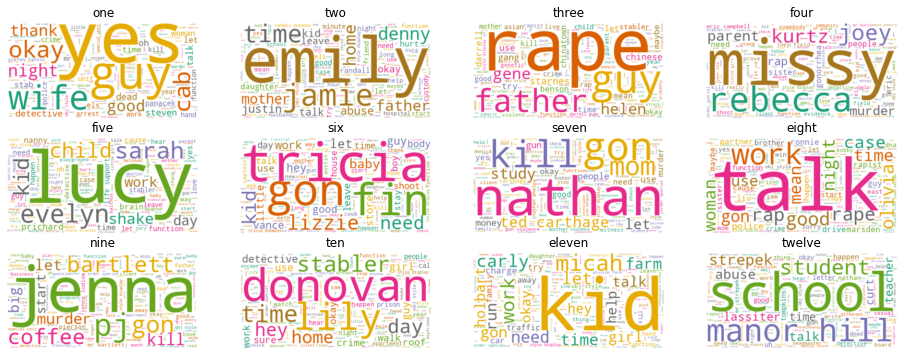

In [23]:
# Reset the output dimensions

plt.rcParams['figure.figsize'] = [16, 6]

# Create subplots for each comedian
for index, season in enumerate(data.columns):
    wc.generate(data_clean.transcript[season])
    
    plt.subplot(3, 4, index+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(seasons[index])
    
plt.show()

In [24]:
# Find the number of unique words
# Identify the non-zero items in the document-term matrix, meaning that the word occurs at least once
unique_list = []
for season in data.columns:
    uniques = data[season].nonzero()[0].size
    unique_list.append(uniques)

In [25]:
# Create a new dataframe that contains this unique word count
data_words = pd.DataFrame(list(zip(seasons, unique_list)), columns=['season', 'unique_words'])
data_unique_sort = data_words.sort_values(by='unique_words')
data_unique_sort

,season,unique_words
7,eight,940
0,one,974
6,seven,1030
3,four,1035
11,twelve,1039
9,ten,1058
5,six,1086
10,eleven,1128
4,five,1154
2,three,1172
